# Setup

Look nice plotting:

In [1]:
## web graphics
%matplotlib inline
## interactive graphics
#%matplotlib notebook
%config InlineBackend.figure_format = 'png' 

science libraries (using autograd instead of tensorflow for easy prototyping)

In [15]:
import autograd.numpy as np
import autograd.scipy as sp
from autograd import grad
from autograd.util import flatten_func
import librosa
from importlib import reload
import matplotlib.pyplot as plt
from librosa.display import specshow
# display more of the array
np.set_printoptions(edgeitems=5)


# Doing things

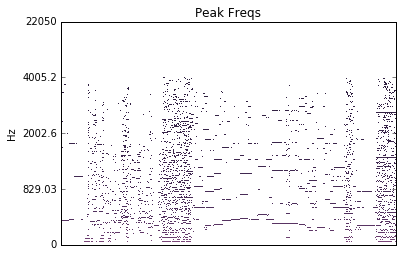

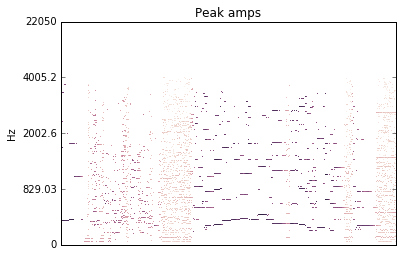

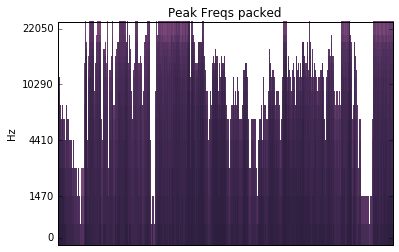

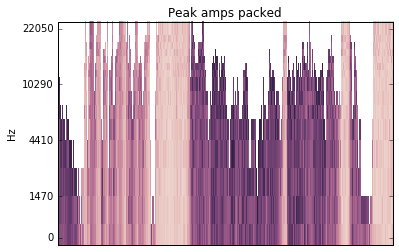

In [5]:
import src.danscriptors.array_ops as array_ops
import src.danscriptors.analysis as analysis
array_ops = reload(array_ops)
analysis = reload(analysis)
features = analysis.harmonic_index('samples/clarinet.mp3', debug=True, cached=False)

In [6]:
features

{'harm_rms': array([[ 0.30833048,  0.30833048,  1.76791084,  3.75158668,  4.59856319,
         ...,  0.02517231,  0.02567684,  0.02534481,  0.02885316,  0.0292004 ]], dtype=float32),
 'metadata': {'args': {'analysis': 'harmonic_index',
   'duration': 120.0,
   'high_pass_f': 40.0,
   'hop_length': 1024,
   'low_pass_f': 4000.0,
   'n_fft': 4096,
   'n_peaks': 16,
   'offset': 0.0,
   'pitch_median': 5},
  'dur': 42.8930612244898,
  'harmonicfile': '/Users/dan/Source/mlmistrels/samples/clarinet___vJfmog.harmonic.wav',
  'key': 'clarinet___vJfmog',
  'metadatafile': '/Users/dan/Source/mlmistrels/samples/clarinet___vJfmog.json',
  'sr': 44100},
 'peak_f': array([[ 3645.01586914,  3645.01586914,  3636.27880859,  3636.34741211,
          3636.34741211, ...,  2598.13647461,  2598.13647461,
          2598.13647461,  2598.13647461,  2599.9453125 ],
        [ 3305.57128906,  3305.57128906,  3306.04223633,  3306.04223633,
          3306.04223633, ...,  1432.58959961,  1432.58959961,
          21

In [13]:
peak_power, peak_f, rms, harm_rms = features['peak_power'], features['peak_f'], features['rms'], features['harm_rms']
peak_rms.shape, peak_f.shape, rms.shape, harm_rms.shape

((16, 1848), (16, 1848), (1, 1848), (1, 1848))

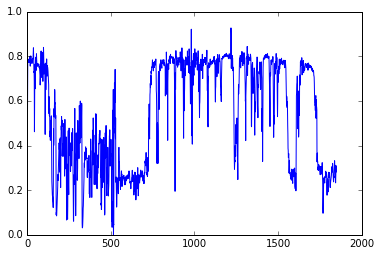

In [19]:
plt.plot((harm_rms/rms).ravel()); # noisiness 